## Exploring Weather Trends  
Sanatbek Matlatipov started 01.05.2021 18:37, Tashkent


#### SQL scripts to exrtract city_list, city_data and global_data

Extrcting all `city_list` to look through: ```SELECT * FROM city_list```

Extracting all ``city_data``: ```SELECT * FROM city_data```

Extracting only ```Tashkent``` data: ```SELECT * FROM city_data WHERE city = 'Tashkent'```

Extrcting all `global_data`: ```SELECT * FROM global_data```

Extracting <b>periodical</b> `global_data`: ```SELECT * FROM global_data WHERE year >= 1832 and year <= 2013```



#### Step 1. importing libraries
I used CSV file Reading and Writing Panda Python library (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to import local and global whether data with city lists which provided by Udacity Data Analyst program.
Seaborn(https://seaborn.pydata.org/index.html) python library is going to be used to visualize and compare the weather data.  

In [1]:
#%pip install seaborn ## Run this only one time to install seaborn data visualization python library
import pandas as pd # CSV reader panda library
import seaborn as sns # Seaborn data visualization library
import matplotlib.pyplot as plt # Matplotlib for styling
import matplotlib.ticker as ticker #tick locators and formatters
%matplotlib inline 

#### Step 2. Importing data from CSV files
Here, I import the ``city_list``, ``city_data`` and ``global_data`` csv files into file objects using ``csv.reader()`` than can be iterable like lists. Then I converted ```DataFrame``` to ```Dictinory``` for not confusing with year when combining two table.  

In [2]:
### Importing city_list.csv file into city_lists file object
city_lists = pd.read_csv('./dataset/city_list.csv', delimiter = ',') 
       
# Importing city_data.csv file into all_city_data file object
city_data = pd.read_csv('./dataset/city_data.csv', delimiter = ',') 
tashkent_city_data = {}
for index, row in city_data.iterrows():
    if row['city'] == 'Tashkent':
        tashkent_city_data[row['year']] =  row['avg_temp']

#for head in city_data:
global_data = pd.read_csv('./dataset/global_data.csv', delimiter = ',')
global_dict_data = {}
for index, row in global_data.iterrows():
    global_dict_data[int(row['year'])] =  row['avg_temp']


####  Step 3. Combine the dictionary data into the one dictionary

In [3]:
combined_data = {}
year = []
avg_temp_tashkent = []
avg_temp_global = []

for year_index in global_dict_data:
    if year_index in tashkent_city_data:
        year.append(year_index)
        avg_temp_tashkent.append(tashkent_city_data[year_index])
        avg_temp_global.append(global_dict_data[year_index])

combined_data['year'] = year
combined_data['avg_temp_tashkent'] = avg_temp_tashkent
combined_data['avg_global_temp'] = avg_temp_global

#### Step 4. Moving average calculator - 
`period` - number of periods to consider when calculating `m-Moving average` 

`data` - Dictionary which is about combining with global and my local data

<b>return</b> pandas DateFrame formot to draw well on line graph

This method can be generalized more. 

In [4]:
def moving_average(period, data):
    
    if (len(data['year']) < period):
        print('Error!')
        return
    
    year = []
    avg_temp_tashkent = []
    avg_temp_global = []
    sum_of_tashkent_data = 0
    sum_of_global_data = 0
    index = 0

    while index < period:
        sum_of_tashkent_data += data['avg_temp_tashkent'][index]
        sum_of_global_data += data['avg_global_temp'][index]
        index += 1

    year.append(data['year'][index - 1])
    avg_temp_tashkent.append(sum_of_tashkent_data / period)
    avg_temp_global.append(sum_of_global_data / period)
    
    while index < len(data['year']):
        sum_of_tashkent_data -= data['avg_temp_tashkent'][index-period]
        sum_of_global_data -= data['avg_global_temp'][index-period]
        
        sum_of_tashkent_data += data['avg_temp_tashkent'][index]
        sum_of_global_data += data['avg_global_temp'][index]
        
        year.append(data['year'][index])
        avg_temp_tashkent.append(sum_of_tashkent_data / period)
        avg_temp_global.append(sum_of_global_data / period)
        
        index += 1
        
    moving_averaged_data = {}
    moving_averaged_data['year'] = year
    moving_averaged_data['avg_temp_tashkent'] = avg_temp_tashkent
    moving_averaged_data['avg_global_temp'] = avg_temp_global
    return pd.DataFrame(moving_averaged_data)                
            


#### Step 5. Plotting Moving Average by using `Seaborn`

In [5]:
def plotting_MA (dataframe, period):
    sns.set_theme(style="darkgrid")

    # increases the size of the plot
    figure, ax = plt.subplots(figsize=(20,10))

    # Plot the responses for different events and regions
    title = str(period) + ' - Moving average weather tempeature by year'
    ax.set_title(title, fontsize=16, color = 'blue')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Average Temperature', fontsize=14, color='red')
    ax = sns.lineplot(data =dataframe, x='year', y='avg_temp_tashkent', 
                       label = 'Tashkent average temperature', marker='o')
    ax = sns.lineplot(data = dataframe, x='year', y='avg_global_temp', 
                       label = 'Global average temperature', marker='o')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.show(ax) 

#### Step 6. printing results

--------------- 5-Moving Average ---------------
   year  avg_temp_tashkent  avg_global_temp
0  1836              9.632            7.740
1  1837              9.600            7.726
2  1838              9.418            7.626
3  1839              9.238            7.522
4  1840              9.334            7.604


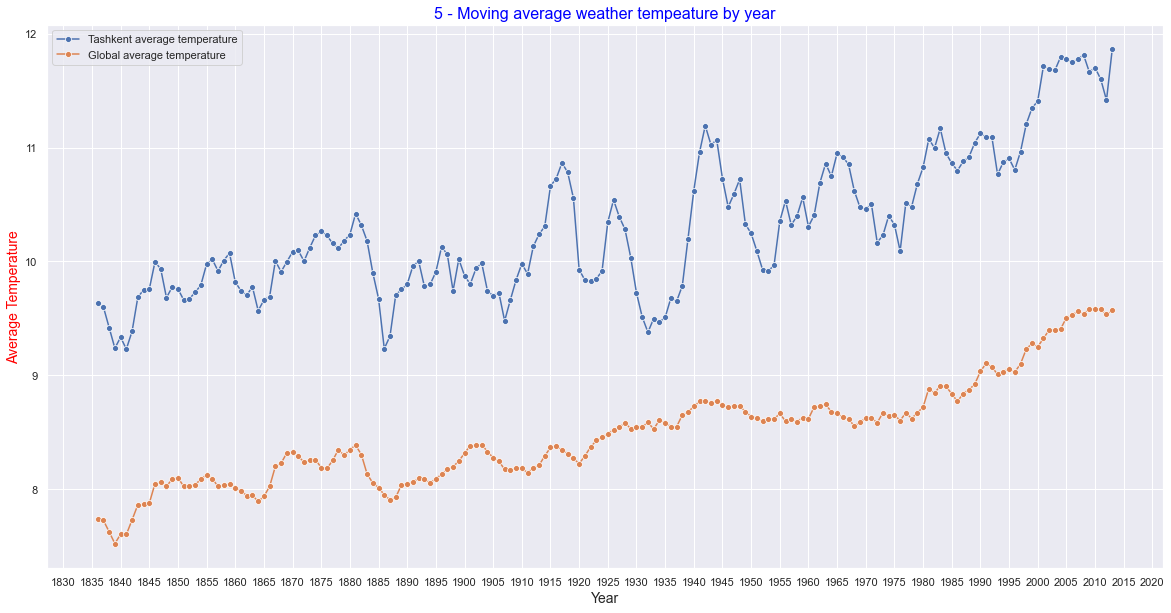


--------------- 7-Moving Average ---------------
   year  avg_temp_tashkent  avg_global_temp
0  1838           9.500000         7.655714
1  1839           9.438571         7.681429
2  1840           9.395714         7.651429
3  1841           9.278571         7.585714
4  1842           9.414286         7.675714


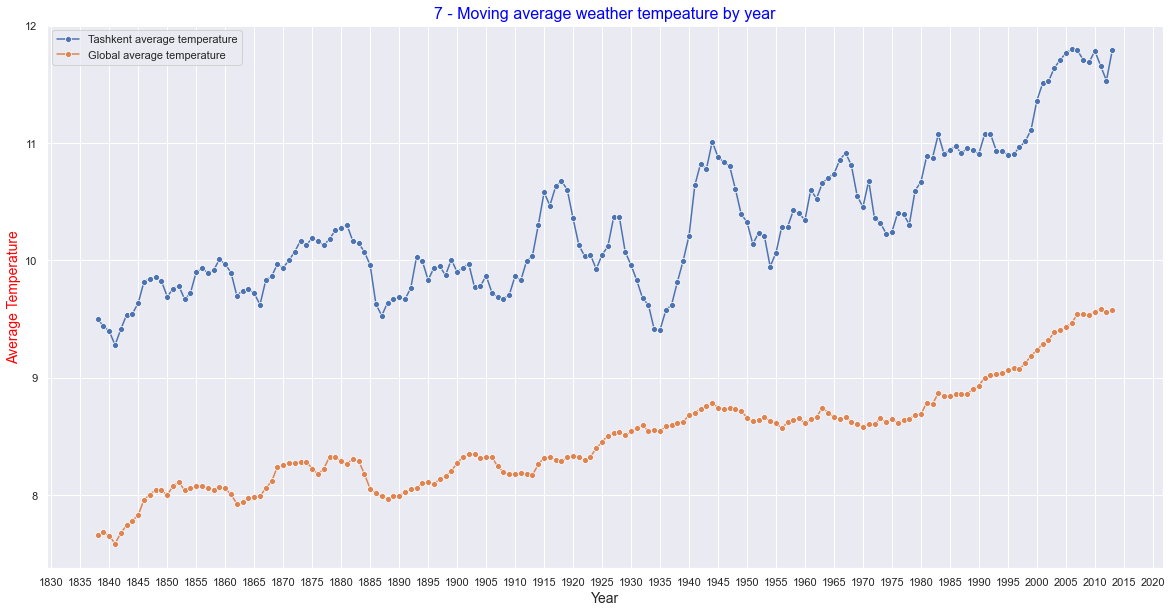

In [6]:
# print('--------------- 1-Moving Average ---------------')
# period = 1
# one_moving_average = moving_average(period, combined_data)
# print(one_moving_average.head())
# plotting_MA(one_moving_average, period)

print('--------------- 5-Moving Average ---------------')
period = 5
five_moving_average = moving_average(period, combined_data)
print(five_moving_average.head())
plotting_MA(five_moving_average, period)

print('\n--------------- 7-Moving Average ---------------')
period = 7
seven_moving_average = moving_average(period, combined_data)
print(seven_moving_average.head())
plotting_MA(seven_moving_average, period)

## Observations
1. Is your city hotter or cooler on average compared to the global average?
    
    My city Tashkent is always hotter than global average according to the 5-,7-year Moving average line graphs. 
    

2.  Has the difference been consistent over time?

    Yes, the difference has been consistent over time, in fact Tashkent city temperature is almost around 1-2 celcium higher than  global average. 


3. “How do the changes in your city’s temperatures over time compare to the changes in the global average?”

    Tashkent's temperature has rised steadily over time. But, we can see sometimes falling on global average. 
    
4. What does the overall trend look like? 

    Both global and my city's temperature has risen according to the line graph. 
    
    The world getting hotter. 

5. Is the world getting hotter or cooler? 
   Overall the world is getting hotter. 
   
   
6. Has the trend been consistent over the last few hundred years?

    Eventhough, the first one hundred year of gloabl average temperature wheter trend has much fluctuated(From 1835 to 1935), temperature didn't change compared to 1835. However, It has drammatically increased for the next decade.

02.05.2021 23:55